In [101]:
import pandas as pd
import numpy as np

In [135]:
df = pd.read_csv('dataset/train.csv')

In [136]:
df.shape

(36992, 25)

In [137]:
df["age"].unique()

array([18, 32, 44, 37, 31, 13, 21, 42, 45, 25, 60, 11, 34, 40, 16, 57, 39,
       33, 30, 19, 48, 43, 29, 10, 20, 61, 17, 12, 52, 26, 49, 24, 22, 36,
       58, 41, 50, 23, 38, 35, 28, 53, 55, 59, 47, 54, 62, 51, 56, 27, 14,
       46, 15, 64, 63], dtype=int64)

In [139]:
df["gender"].value_counts()

F          18490
M          18443
Unknown       59
Name: gender, dtype: int64

In [145]:
df["region_category"].isna().sum() #.value_counts()

5428

In [147]:
df["membership_category"].isna().sum()
df["membership_category"].value_counts()

Basic Membership       7724
No Membership          7692
Gold Membership        6795
Silver Membership      5988
Premium Membership     4455
Platinum Membership    4338
Name: membership_category, dtype: int64

In [149]:
df['joining_date'].describe()

count          36992
unique          1096
top       2015-06-02
freq              55
Name: joining_date, dtype: object

In [152]:
df["joined_through_referral"].value_counts()

No     15839
Yes    15715
?       5438
Name: joined_through_referral, dtype: int64

In [153]:
df["preferred_offer_types"].value_counts() ## all Good

Gift Vouchers/Coupons       12349
Credit/Debit Card Offers    12274
Without Offers              12081
Name: preferred_offer_types, dtype: int64

In [154]:
df["medium_of_operation"].value_counts()

Desktop       13913
Smartphone    13876
?              5393
Both           3810
Name: medium_of_operation, dtype: int64

In [155]:
df["internet_option"].value_counts() ## all Good

Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: internet_option, dtype: int64

In [159]:
df["last_visit_time"].unique() ## all Good

array(['16:08:02', '12:38:13', '22:53:21', ..., '04:14:05', '09:50:03',
       '01:39:52'], dtype=object)

In [160]:
df["days_since_last_login"].unique() ## -999 is problem

array([  17,   16,   14,   11,   20,   23,   10,   19,   15,   13, -999,
          5,   12,    9,   21,   18,    1,   22,    4,    8,    3,    6,
          2,   24,    7,   26,   25], dtype=int64)

In [161]:
df["days_since_last_login"].value_counts()

 12     2380
 13     2373
 14     2307
 15     2278
 11     2262
 10     2091
 16     2068
-999    1999
 9      1863
 17     1747
 8      1571
 18     1444
 7      1442
 19     1308
 6      1257
 5      1234
 20     1184
 21     1015
 4       998
 22      895
 3       852
 23      727
 2       613
 24      471
 1       328
 25      203
 26       82
Name: days_since_last_login, dtype: int64

In [171]:
df[df["avg_time_spent"]<0]["avg_time_spent"] ## 1719 Rows with Negative Values

28      -936.744818
41      -930.207844
60      -615.344319
79      -687.629574
116     -494.083877
            ...    
36794   -977.809108
36819   -910.568433
36956   -746.034591
36987   -650.682759
36988   -638.123421
Name: avg_time_spent, Length: 1719, dtype: float64

In [175]:
df["avg_transaction_value"].unique() ## 0 Rows with Negative Values

array([53005.25, 12838.38, 21027.  , ..., 38127.56,  2378.86,  2189.68])

In [176]:
df[df["avg_transaction_value"]<0]["avg_transaction_value"] ## 0 Rows with Negative Values

Series([], Name: avg_transaction_value, dtype: float64)

In [188]:
# df[(df["avg_frequency_login_days"]=="Error") ? 0 : (df["avg_frequency_login_days"].astype(float) < 0)].unique() ## 0 Rows with Negative Values

avg_frequency_login_days some are -ve some have Error as msg and all are string

In [189]:
df["avg_frequency_login_days"].unique() ## Some Rows with Negative Values

array(['17.0', '10.0', '22.0', ..., '-9.32551114210603',
       '-8.759329712785977', '27.8399274405269'], dtype=object)

In [193]:
df["points_in_wallet"].isna().sum()
# na values 3443

3443

In [196]:
# -ve values present - 136 record with -ve balance
df[df["points_in_wallet"]<0].shape

(136, 25)

In [197]:
df["used_special_discount"].unique() ## ALl good

array(['Yes', 'No'], dtype=object)

In [198]:
df["offer_application_preference"].unique() ## ALl good

array(['Yes', 'No'], dtype=object)

In [199]:
df["past_complaint"].unique() ## ALl good - No null values

array(['No', 'Yes'], dtype=object)

In [202]:
df["complaint_status"].describe() ## ALl good - No null values

count              36992
unique                 5
top       Not Applicable
freq               18602
Name: complaint_status, dtype: object

In [204]:
df["feedback"].unique()## ALl good - No null values

array(['Products always in Stock', 'Quality Customer Care',
       'Poor Website', 'No reason specified', 'Poor Product Quality',
       'Poor Customer Service', 'Too many ads', 'User Friendly Website',
       'Reasonable Price'], dtype=object)

In [140]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [105]:
# Cleaning the Null and Negative values
# df = df[df["churn_risk_score"]>=0]

# changinng negative values to zero
df["churn_risk_score"] = np.where((df["churn_risk_score"] < 0),0,df["churn_risk_score"])

In [106]:
df[df["joined_through_referral"] == '?'].count()

customer_id                     5438
Name                            5438
age                             5438
gender                          5438
security_no                     5438
region_category                 4637
membership_category             5438
joining_date                    5438
joined_through_referral         5438
referral_id                     5438
preferred_offer_types           5395
medium_of_operation             5438
internet_option                 5438
last_visit_time                 5438
days_since_last_login           5438
avg_time_spent                  5438
avg_transaction_value           5438
avg_frequency_login_days        5438
points_in_wallet                4934
used_special_discount           5438
offer_application_preference    5438
past_complaint                  5438
complaint_status                5438
feedback                        5438
churn_risk_score                5438
dtype: int64

In [107]:
df2 = df[df["churn_risk_score"] < 0]

In [108]:
import seaborn as sns

In [109]:
df2.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
23,fffe43004900440032003300320035003700,Iliana Gagnier,48,M,GX2SOJ5,Town,Basic Membership,2017-11-10,Yes,xxxxxxxx,...,72.52,15860.41,3.2073857931601104,529.03000,No,Yes,No,Not Applicable,No reason specified,-1
50,fffe43004900440031003700370031003300,Luisa Allinder,23,M,UAAYTIM,Village,Gold Membership,2015-10-22,Yes,CID24995,...,65.25,5136.08,Error,755.22000,No,Yes,No,Not Applicable,Poor Customer Service,-1
62,fffe43004900440033003600300039003900,Tyesha Maravilla,40,M,EY34UCV,Town,Premium Membership,2017-01-31,?,CID15184,...,33.82,39735.58,25.0,784.32000,Yes,No,Yes,No Information Available,Too many ads,-1
63,fffe43004900440031003400380035003700,Damaris Hammill,18,F,WGKRXHK,City,Basic Membership,2016-06-17,Yes,CID29938,...,156.06,4783.23,28.75639925305587,597.87000,Yes,No,Yes,No Information Available,Too many ads,-1
85,fffe43004900440032003200300031003600,Samantha Linley,55,M,E1EYCEB,City,Platinum Membership,2015-04-14,Yes,CID47303,...,1316.52,2367.56,25.0,441.83655,Yes,No,No,Not Applicable,No reason specified,-1


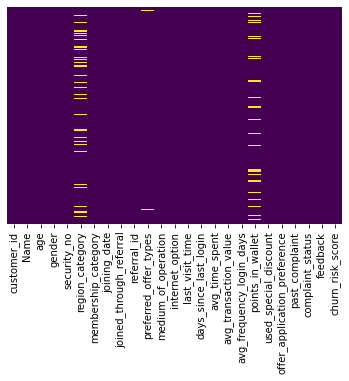

In [110]:
sns.heatmap(df2.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [111]:
df2.shape

(1163, 25)

In [112]:
df2.isna().sum()

customer_id                       0
Name                              0
age                               0
gender                            0
security_no                       0
region_category                 165
membership_category               0
joining_date                      0
joined_through_referral           0
referral_id                       0
preferred_offer_types            12
medium_of_operation               0
internet_option                   0
last_visit_time                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                102
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
churn_risk_score                  0
dtype: int64

In [113]:
df.shape

(36992, 25)

In [114]:
df.isna().count()

customer_id                     36992
Name                            36992
age                             36992
gender                          36992
security_no                     36992
region_category                 36992
membership_category             36992
joining_date                    36992
joined_through_referral         36992
referral_id                     36992
preferred_offer_types           36992
medium_of_operation             36992
internet_option                 36992
last_visit_time                 36992
days_since_last_login           36992
avg_time_spent                  36992
avg_transaction_value           36992
avg_frequency_login_days        36992
points_in_wallet                36992
used_special_discount           36992
offer_application_preference    36992
past_complaint                  36992
complaint_status                36992
feedback                        36992
churn_risk_score                36992
dtype: int64

In [115]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [116]:
df = df.astype(str).apply(label_encoder.fit_transform)

In [117]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,32243,28675,8,0,34811,2,3,959,1,11358,...,12869,30769,746,20503,1,1,0,1,4,2
1,7055,34951,22,0,5804,0,4,970,0,2225,...,13051,2199,732,23699,1,0,1,2,5,1
2,5910,25315,34,0,1534,1,2,680,2,471,...,19239,8374,779,4792,0,1,1,3,3,5
3,32400,10462,27,1,32501,0,2,667,2,5506,...,19546,11560,1637,7111,0,1,1,4,3,5
4,6070,24704,21,0,29819,0,2,985,1,11358,...,3123,10936,743,12218,0,1,1,2,3,5


In [118]:
from sklearn.model_selection import train_test_split
X = df[['age', 'gender',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback']]
y = df["churn_risk_score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [119]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [120]:
model.fit(X_train,y_train)

LinearRegression()

In [121]:
y_pred = model.predict(X_test)

In [205]:
from sklearn.metrics import f1_score,mean_squared_error
score = f1_score(y_test, y_pred,average="macro")
score

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [123]:
result_df = pd.DataFrame({
    "churn_risk_score":y_pred.astype(int)
})

In [124]:
result_df

,churn_risk_score
0,2
1,2
2,3
3,3
4,2
...,...
12203,2
12204,4
12205,3
12206,3


In [125]:
real_test_data = pd.read_csv("dataset/test.csv")
real_test_data.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,2015-11-02,No,xxxxxxxx,...,12,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,2016-03-01,No,xxxxxxxx,...,11,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,2017-03-03,No,xxxxxxxx,...,18,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,CID8941,...,-999,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,2015-05-05,Yes,CID5690,...,6,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website


In [126]:
real_test_data2 = real_test_data[['age', 'gender',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback']]

In [127]:
real_test_data2.dtypes

age                               int64
gender                           object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
dtype: object

In [128]:
# str_needed = real_test_data.select_dtypes(exclude=["float64","int64"])
encoded = real_test_data2.astype(str).apply(label_encoder.fit_transform)
real_test_pred = model.predict(encoded)
encoded.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,40,0,2,4,305,1,2,3,2,5375,4,9699,12556,936,10445,1,0,0,1,2
1,31,1,2,1,425,1,2,2,0,16603,3,9400,19623,943,10110,1,0,0,1,3
2,21,0,1,5,792,1,1,1,1,12359,10,5667,10979,458,9476,1,0,1,3,0
3,54,1,1,5,960,2,0,0,0,11087,0,10635,10935,439,10903,1,0,1,0,7
4,6,0,1,2,124,2,2,3,1,2190,23,8955,12529,942,1763,0,1,1,3,3


In [129]:
final_result_df = pd.DataFrame({
    "customer_id":real_test_data["customer_id"],
    "churn_risk_score":real_test_pred.astype(int)
})

In [130]:
final_result_df.head()

,customer_id,churn_risk_score
0,fffe43004900440031003700300030003400,3
1,fffe43004900440031003900370037003300,3
2,fffe43004900440034003800360037003000,3
3,fffe43004900440036003200370033003400,2
4,fffe43004900440035003000370031003900,4


In [131]:
final_result_df.to_csv("try-1.csv")